In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Membaca Gambar

In [4]:
image = cv2.imread("parkir.jpg")


## Menampilkan Gambar

In [7]:
cv2.imshow("Gambar Parkir", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#202331015_Haidar Rafi Purnomo

## Mendeteksi Tepi Gambar

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,75,150)

In [10]:
cv2.imshow("Gambar Parkir", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

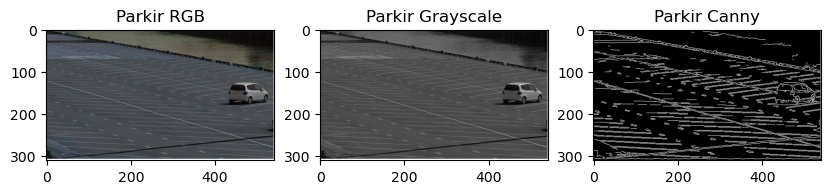

In [11]:
fig, axs = plt.subplots(1,3, figsize=(10,10))
axs = axs.ravel()

axs[0].imshow(image, cmap="gray")
axs[0].set_title("Parkir RGB")

axs[1].imshow(gray, cmap = "gray")
axs[1].set_title("Parkir Grayscale")

axs[2].imshow(edges, cmap="gray")
axs[2].set_title("Parkir Canny")

plt.show()

#202331015_Haidar Rafi Purnomo

## Deteksi Garis Lurus

In [13]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180,30, maxLineGap= 250)
img_line = image.copy()

In [14]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (100,8,255),1)

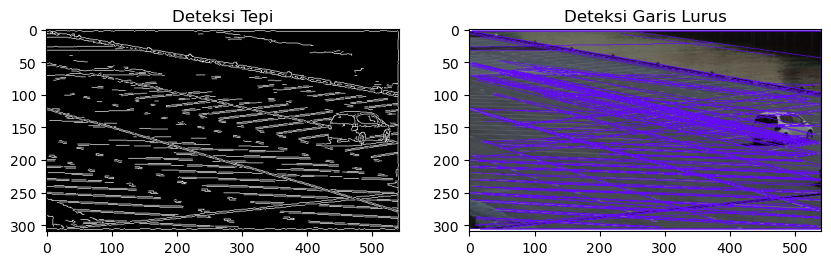

In [15]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs = axs.ravel()

axs[0].imshow(edges, cmap="gray")
axs[0].set_title("Deteksi Tepi")

axs[1].imshow(img_line, cmap="gray")
axs[1].set_title("Deteksi Garis Lurus")

plt.show()

#202331015_Haidar Rafi Purnomo

## Geometrik

In [24]:
image = cv2.imread('plat.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#202331015_Haidar Rafi Purnomo

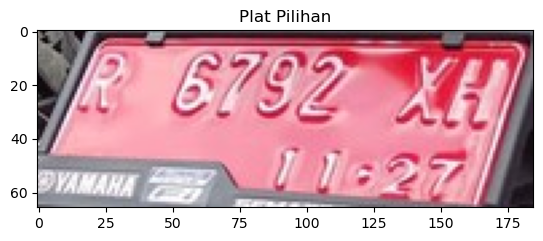

In [34]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# Menggunakan Canny Edge Detection untuk mendeteksi tepi
edges = cv2.Canny(blurred_image, 100, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / h
                                                                                    #202331015_Haidar  Rafi Purnomo
        if 2 < aspect_ratio < 5:
            plate = image[y:y+h, x:x+w]
            
            # Menambahkan Transformasi Perspektif untuk meluruskan plat nomor
            # Koordinat titik plat nomor pada gambar
            pts1 = np.float32([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
            # Koordinat titik tujuan (setiap plat nomor dianggap persegi panjang)
            pts2 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])

            # Matriks transformasi perspektif
            matrix = cv2.getPerspectiveTransform(pts1, pts2)
            result = cv2.warpPerspective(image, matrix, (w, h))
            
            plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
            plt.title('Plat Pilihan')
            plt.show()
            break